<a href="https://colab.research.google.com/github/wchon/Stock-Price-Prediction-Model/blob/main/stock_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade pandas
%pip install --upgrade pandas-datareader

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:

#get stock quote
df = web.DataReader('TSM', data_source='yahoo', start='2001-01-01', end='2022-11-01')
df



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,8.795005,8.431074,8.795005,8.552384,2782737.0,4.473569
2001-01-03,9.583523,8.188453,8.340091,9.371230,6085215.0,4.901891
2001-01-04,9.522868,9.280247,9.371230,9.371230,6000309.0,4.901891
2001-01-05,10.008109,9.704833,9.704833,9.765489,5165880.0,5.108119
2001-01-08,9.704833,9.462213,9.704833,9.644178,3272802.0,5.044667
...,...,...,...,...,...,...
2022-10-26,61.980000,60.430000,60.860001,60.840000,14006000.0,60.840000
2022-10-27,62.450001,60.910000,61.849998,60.950001,12937600.0,60.950001
2022-10-28,62.029999,60.070000,60.770000,62.009998,11972300.0,62.009998


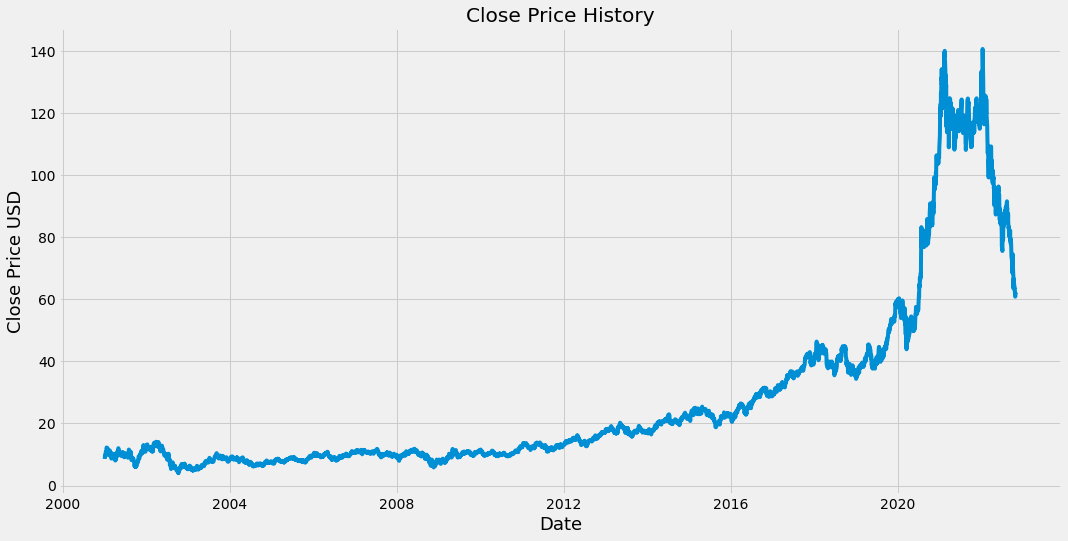

(5494, 6)

In [ ]:
df.shape
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.show()
df.shape

In [ ]:
#create new dataframe with the 'Close' column
data = df.filter(['Close'])
#convert dataframe to a numpy array
dataset = data.values

#get no. of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len


4396

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.03332657],
       [0.03931832],
       [0.03931832],
       ...,
       [0.42449292],
       [0.42112696],
       [0.42134649]])

In [ ]:
#create scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print

[array([0.03332657, 0.03931832, 0.03931832, 0.04220324, 0.04131557,
       0.04531007, 0.04886074, 0.04886074, 0.05019223, 0.04819499,
       0.05440866, 0.0604004 , 0.05973466, 0.05596207, 0.05929082,
       0.05862507, 0.0564059 , 0.04997032, 0.0480796 , 0.05265995,
       0.05645916, 0.05542947, 0.052873  , 0.04882522, 0.04381879,
       0.04193693, 0.04555862, 0.04364125, 0.04626875, 0.04797306,
       0.05052955, 0.05337008, 0.04985492, 0.04570065, 0.04449341,
       0.04406733, 0.04229201, 0.04264707, 0.03952248, 0.03760512,
       0.03437401, 0.03678846, 0.03827975, 0.04694338, 0.04474196,
       0.0412268 , 0.03664644, 0.03472908, 0.04112028, 0.0401616 ,
       0.04186592, 0.04101376, 0.04019711, 0.03785367, 0.03732106,
       0.04140433, 0.04513254, 0.04314417, 0.04268257, 0.04023261])]
[0.04051666861266345]


In [ ]:
#convert xtrain and ytrain to a numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data, since LSTM takes three dimentional data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4336, 60, 1)

In [ ]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4336/4336 [==============================] - 135s 30ms/step - loss: 1.1270e-04


In [ ]:
#create testing data set
#create a new array containing scaled values from index 1954 to 2517
test_data = scaled_data[training_data_len - 60: ,:]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert data to a numpy array
x_test = np.array(x_test)


In [ ]:
#reshape the data since LSTM takes 3 dimentional data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

x_test.shape[0]


1098

In [ ]:
#get the model prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


35/35 [==============================] - 2s 18ms/step


In [ ]:
#get the root mean squared error (RMSE)
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.819662452493383

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


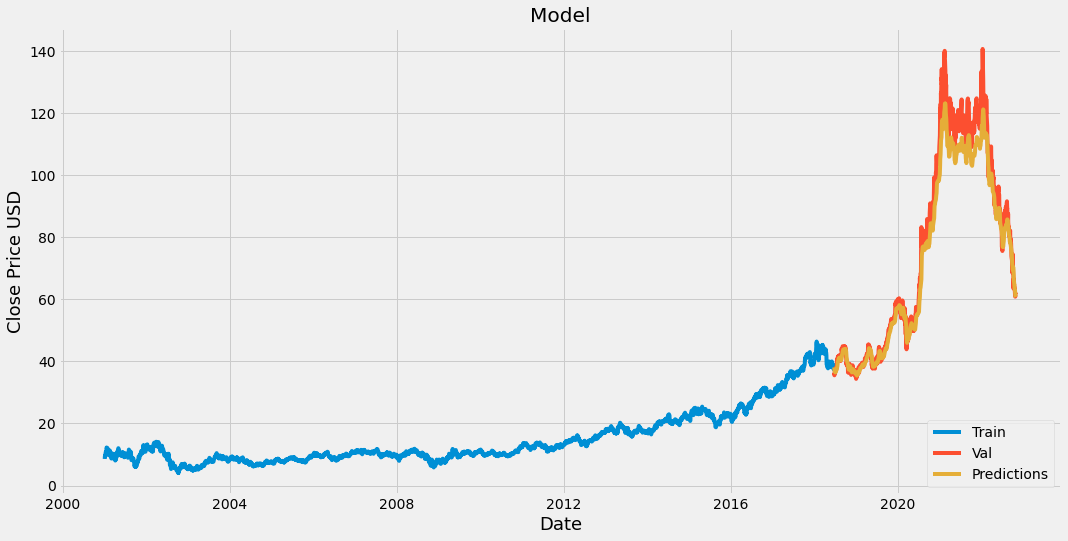

In [ ]:
#plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')

In [ ]:
MUR_quote = web.DataReader('MUR', data_source='yahoo', start='2022-09-01', end='2022-11-14')
new_df = MUR_quote.filter(['Close'])
last_60_days = new_df[-76:].values

last_60_days_scaled = scaler.fit_transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 23ms/step
[[47.03313]]
